Author: *Ana Paula Bernardo*

Linkedin: https://www.linkedin.com/in/ana-paula-sbernardo/

GitHub: https://github.com/anaapbernardo

# Introduction

This project is a general analysis of the eating habits of the students who answered the PeNSE survey of 2015.
    
PeNSE is a survey research that investigates information that makes it possible to know and measure the risk factors and health protection of teenagers.

The survey provides information about:

- Socioeconomic aspects; 
- Social and family contexts; 
- Behavioral risk factors related to eating habits, physical inactivity, smoking, alcohol consumption and other drugs; 
- Sexual and reproductive health; 
- Exposure to accidents and violence; 
- Hygiene habits; 
- Oral health; 
- Mental health; 
- Perception of body image, among other topics. 
    
Characteristics of the school environment and surroundings are also considered, including information related to:
- Infrastructure available for food and physical activity; 
- Accessibility; Sanitation; 
- Existence of rules and standards of conduct adopted by schools; 
- Health care policies; Safety level of the surroundings, among other aspects. 

Source: https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=o-que-e

More information can be found at:

https://biblioteca.ibge.gov.br/visualizacao/livros/liv97870.pdf

https://www.youtube.com/watch?v=z4BBCHZUvD4&ab_channel=IBGE

# Preliminary Analysis

In [64]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency

In [2]:
# Links
url_data = 'https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/PENSE_AMOSTRA2_ALUNO.CSV?raw=true'
url_dict = 'https://github.com/anaapbernardo/Bootcamp_DataScience/blob/main/Files%20-%20Bootcamp%20Data%20Science/Dicionario_PENSE_Microdados_AMOSTRA2.xls?raw=true'

In [3]:
# Reading the dataset
df = pd.read_csv(url_data, sep=';', thousands='.', decimal=',', na_values=99)

# Reading the Q&A dictionary
df_dict = pd.read_excel(url_dict)

### Dictionaries

In [4]:
dict_color = {1: 'White',
              2: 'Black',
              3: 'Yellow (Asian descendants)',
              4: 'Brown (Pardo)',
              5: 'Indian',
              99: 'Not informed'
             }

In [5]:
dict_answers = {1: 'None',
                2: '1 day',
                3: '2 days',
                4: '3 days',
                5: '4 days',
                6: '5 days',
                7: '6 days',
                8: 'Everyday',
                99: 'Not informed'
               }

In [6]:
dict_answers_hungry = {1: 'Never',
                       2: 'Rarely',
                       3: 'Sometimes',
                       4: 'Most of the time',
                       5: 'Always',
                       99: 'Not informed'
                      }

### Functions

In [7]:
# Dictionary to interpret the question's code

def get_question_description(colum_name) -> dict:
    
    return_dict = dict()

    description_row = df_dict.query(f'VARIÁVEL == "{colum_name}"')['QUESTIONÁRIO DO ALUNO']
    return_dict['Question'] = description_row.values[0]
   
    values = list()
    index = description_row.index[0] + 1
    value = df_dict.iloc[index]['VARIÁVEL']
    
    # Verifying if caracter is or not equal as some answers has the result -1
    while str(value)[0].isnumeric() or str(value)[0] == '-':
        values.append([value, df_dict.iloc[index]['QUESTIONÁRIO DO ALUNO']])
        index += 1
        value = df_dict.iloc[index]['VARIÁVEL']
    return_dict['Description'] = dict(values)
    
    return return_dict

In [8]:
def get_cross_frequency(dataframe: pd.DataFrame, 
                        question1: str, question2: str, 
                        dict1: dict, dict2: dict):
    
    cross_frequency = pd.crosstab(dataframe[question1], dataframe[question2], normalize = 'index') * 100
    cross_frequency.rename(index = dict1, inplace = True)
    cross_frequency.rename(columns = dict2, inplace = True)
    
    return cross_frequency.round(2)

# Data Cleaning

In [9]:
# Printing original dataframe
df.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1.0,13,7.0,7.0,1.0,...,1223,1,299.735235,1,2,4,1,1.0,1.0,296.0
1,2015,76,1,1,2,1.0,14,4.0,7.0,1.0,...,1223,1,355.170081,1,2,4,1,2.0,1.0,296.0
2,2015,76,1,1,1,4.0,13,6.0,7.0,1.0,...,1223,1,299.735235,1,2,4,1,3.0,1.0,296.0
3,2015,76,1,1,1,1.0,14,6.0,7.0,1.0,...,1223,1,355.170081,1,2,4,1,4.0,1.0,296.0
4,2015,76,1,1,1,1.0,13,9.0,7.0,1.0,...,1223,1,299.735235,1,2,4,1,5.0,1.0,296.0


In [10]:
df.shape

(16556, 181)

As a data cleaning step, I decided to remove all rows that had 'Not Informed' answers. This way I could work with only the full answered dataset.

In [11]:
# Removing all Not Informed (99 answers) that I set as NaN
df_clean = df.dropna()
df_clean.head()

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1.0,13,7.0,7.0,1.0,...,1223,1,299.735235,1,2,4,1,1.0,1.0,296.0
1,2015,76,1,1,2,1.0,14,4.0,7.0,1.0,...,1223,1,355.170081,1,2,4,1,2.0,1.0,296.0
3,2015,76,1,1,1,1.0,14,6.0,7.0,1.0,...,1223,1,355.170081,1,2,4,1,4.0,1.0,296.0
4,2015,76,1,1,1,1.0,13,9.0,7.0,1.0,...,1223,1,299.735235,1,2,4,1,5.0,1.0,296.0
5,2015,76,1,1,2,4.0,14,12.0,6.0,1.0,...,1223,1,355.170081,1,2,4,1,6.0,1.0,296.0


In [12]:
df_clean.shape

(14749, 181)


# Data Analysis

For this analysis, I would like to assess whether the students' skin color influences their eating habits.

## **Distribuition of the students according to their skin color**

In [13]:
get_question_description('VB01002')

{'Question': 'Qual é a sua cor ou raça?',
 'Description': {'1': 'Branca',
  '2': 'Preta',
  '3': 'Amarela',
  '4': 'Parda',
  '5': 'Indígena',
  99: 'Não informado'}}

In [14]:
# Calculating frequency and percentage of the students
frequency = df_clean['VB01002'].value_counts()
percentage = (df_clean['VB01002'].value_counts(normalize = True) * 100).round(2)

# Creating a frequency table
freq_distribuition = pd.DataFrame({'Frequency': frequency, 'Percentage': percentage})
freq_distribuition.rename(index = dict_color, inplace = True)
freq_distribuition.rename_axis('What is your skin color?', axis=1, inplace = True)
freq_distribuition

What is your skin color?,Frequency,Percentage
Brown (Pardo),5979,40.54
White,5956,40.38
Black,1672,11.34
Yellow (Asian descendants),636,4.31
Indian,506,3.43


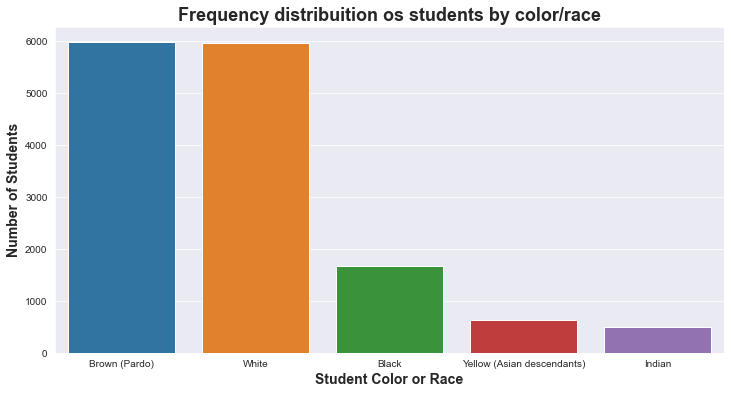

In [63]:
sns.set_style('darkgrid')

ax = sns.barplot(x = freq_distribuition.index, y = 'Frequency', data = freq_distribuition)

ax.figure.set_size_inches(12, 6)
ax.set_title('Frequency distribuition os students by color/race', weight='bold', size=18)
ax.set_xlabel('Student Color or Race', weight='bold', size=14)
ax.set_ylabel('Number of Students', weight='bold', size=14)
ax.set_xaxis()

ax;

More than 80% of the students who participated of PENSE survey answered that they were Brown or White, and the other 20% were distributed between Black, Yellow, and Indian students.

## **Eating habits**

### Healthy eating markers

#### Beans

In [16]:
question_beans = get_question_description('VB02001')
question_beans

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu feijão?',
 'Description': {'1': 'Não comi feijão nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias ',
  '3': '2 dias nos últimos 7 dias ',
  '4': '3 dias nos últimos 7 dias ',
  '5': '4 dias nos últimos 7 dias ',
  '6': '5 dias nos últimos 7 dias ',
  '7': '6 dias nos últimos 7 dias ',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [17]:
# Create Frequency Table (Percentage) - Eating Beans
eating_frequency_beans = get_cross_frequency(df_clean, 'VB01002', 'VB02001', dict_color, dict_answers)
eating_frequency_beans

VB02001,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,12.94,8.88,8.58,8.81,8.55,8.36,7.87,36.00
Black,10.05,9.51,7.60,8.61,6.64,6.82,6.46,44.32
Yellow (Asian descendants),11.32,8.49,7.70,8.02,6.29,8.02,8.96,41.19
Brown (Pardo),10.12,8.16,7.61,9.07,7.26,8.20,7.12,42.47
Indian,15.02,7.91,4.55,8.89,7.71,6.72,7.51,41.70


In [18]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_beans)
p

0.9999992908235432

The frequency table indicates that the habit of eating-beans is quite similar among students, regardless of skin color. In addition, most students eat beans every day, which is an indicator of healthy eating.

According to the chi-square analysis, the null hypothesis is valid (p-value> 0.05). Therefore, when comparing the eating frequency (column), no difference was found between the students and the eating-beans habit.

#### Vegetables

In [19]:
question_vegetables = get_question_description('VB02004A')
question_vegetables

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu pelo menos um tipo de legume ou verdura? Exemplos: alface, abóbora, brócolis, cebola, cenoura, chuchu, couve, espinafre, pepino, tomate etc. Não inclua batata e aipim (mandioca/macaxeira).',
 'Description': {'1': 'Não comi nenhum tipo de salada crua, legume ou verdura cozidos nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [20]:
# Create Frequency Table (Percentage) - Eating Vegetables
eating_frequency_vegetables = get_cross_frequency(df_clean, 'VB01002', 'VB02004A', dict_color, dict_answers)
eating_frequency_vegetables

VB02004A,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,16.52,10.07,10.19,10.80,9.70,7.84,6.67,28.21
Black,19.32,12.80,11.72,11.30,7.24,6.76,6.04,24.82
Yellow (Asian descendants),16.04,11.16,11.16,11.01,8.02,5.82,7.55,29.25
Brown (Pardo),17.18,12.06,11.26,11.26,9.20,7.88,5.69,25.49
Indian,18.18,12.25,11.07,10.47,8.50,7.71,5.73,26.09


In [21]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_vegetables)
p

0.9999999997250583

On average, 26% of the students eat vegetables every day, while 17% never eat them. Here we can notice that this healthy eating marker is more widespread between the frequencies (columns).

According to the chi-squared analysis, there is no difference between the eating-vegetable frequency and the students (p-value > 0.05).

#### Fruits

In [22]:
question_fruits = get_question_description('VB02011')
question_fruits

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu frutas frescas ou salada de frutas? ',
 'Description': {'1': 'Não comi frutas frescas ou salada de frutas nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [23]:
# Create Frequency Table (Percentage) - Eating Fruits
eating_frequency_fruits = get_cross_frequency(df_clean, 'VB01002', 'VB02011', dict_color, dict_answers)
eating_frequency_fruits

VB02011,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,18.50,12.79,12.89,11.79,9.64,8.04,5.66,20.69
Black,19.68,13.10,12.32,12.08,7.89,8.07,5.44,21.41
Yellow (Asian descendants),20.13,13.84,11.79,11.48,8.81,7.70,5.19,21.07
Brown (Pardo),19.94,12.83,13.56,12.28,8.86,7.54,5.59,19.40
Indian,20.16,9.68,14.03,8.89,8.50,8.89,8.50,21.34


In [24]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_fruits)
p

0.9999999935997617

Regarding the habit of eating fruit, the average percentage of students who eat fruit every day (20%) is almost equal to the percentage of students who never eat fruit (19%).

As with the other healthy eating markers, no difference was found (p-value > 0.05) between students and fruit-eating habits, when compared by column.

### Not healthy eating markers

#### Fried Food

In [25]:
question_fried_food = get_question_description('VB02002')
question_fried_food

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu salgados fritos? Exemplo: batata frita (sem contar a batata de pacote) ou salgados fritos como coxinha de galinha, quibe frito, pastel frito, acarajé etc.',
 'Description': {'1': 'Não comi salgados fritos nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [26]:
# Create Frequency Table (Percentage) - Eating Fried Food
eating_frequency_fried_food = get_cross_frequency(df_clean, 'VB01002', 'VB02002', dict_color, dict_answers)
eating_frequency_fried_food

VB02002,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,30.49,22.30,17.04,12.02,6.21,4.03,2.01,5.89
Black,32.72,20.39,14.59,11.12,6.16,4.01,2.33,8.67
Yellow (Asian descendants),33.02,18.55,16.51,11.48,7.23,3.14,2.20,7.86
Brown (Pardo),33.89,20.81,16.04,10.25,6.21,4.16,2.11,6.54
Indian,33.20,22.73,14.82,8.89,5.93,4.74,2.37,7.31


In [27]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_fried_food)
p

0.999999999712004

More than 32% of the students answered not have eaten any type of fried food in the past 7 days.

Also, no difference (p-value > 0.05) was found between the students and the eating fried food frequency.

#### Candies

In [28]:
question_candies = get_question_description('VB02010')
question_candies

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu guloseimas (doces, balas, chocolates, chicletes, bombons ou pirulitos)?',
 'Description': {'1': 'Não comi guloseimas nos últimos 7 dias (0 dia)',
  '2': '1dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [29]:
# Create Frequency Table (Percentage) - Eating Candies
eating_frequency_candies = get_cross_frequency(df_clean, 'VB01002', 'VB02010', dict_color, dict_answers)
eating_frequency_candies

VB02010,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,10.81,14.42,14.34,14.00,10.63,8.04,5.89,21.86
Black,13.22,14.06,13.70,10.89,8.01,7.30,6.34,26.50
Yellow (Asian descendants),12.58,13.36,10.22,12.11,9.43,9.12,6.92,26.26
Brown (Pardo),12.04,14.40,14.37,12.71,9.95,7.78,5.92,22.83
Indian,14.62,15.02,12.85,13.44,7.91,9.29,4.94,21.94


In [30]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_candies)
p

0.9999999223581549

Almost 24% of the students answered that have eaten candy every day.

Regarding the chi-squared analysis, no difference (p-value > 0.05) was found between the students and the frequency eating candy habit.

#### Drinking Soda

In [31]:
question_soda = get_question_description('VB02013')
question_soda

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você tomou refrigerante?',
 'Description': {'1': 'Não tomei refrigerante nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [32]:
# Create Frequency Table (Percentage) - Drinking Soda
eating_frequency_soda = get_cross_frequency(df_clean, 'VB01002', 'VB02013', dict_color, dict_answers)
eating_frequency_soda

VB02013,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,20.05,16.96,16.47,12.06,8.43,6.98,4.75,14.30
Black,18.42,16.87,15.61,13.10,8.61,7.18,4.96,15.25
Yellow (Asian descendants),18.87,17.61,16.04,11.01,10.38,8.02,4.72,13.36
Brown (Pardo),19.33,17.01,17.16,13.87,8.65,6.52,4.62,12.84
Indian,19.57,20.16,18.38,11.86,7.91,5.34,2.77,14.03


In [33]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_soda)
p

0.9999999984357615

Most part of the students don't drink soda every day.

Also, no difference (p-value > 0.05) was found between students and frequency of drinking soda.

#### Industrialized Food

In [34]:
question_industrialized_food = get_question_description('VB02022')
question_industrialized_food

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu alimentos industrializados/ultraprocessados salgados, como hambúrguer, presunto, mortadela, salame, linguiça, salsicha, macarrão instantâneo, salgadinho de pacote, biscoitos salgados?',
 'Description': {'1': 'Não comi alimentos industrializados/ultraprocessados salgados nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [35]:
# Create Frequency Table (Percentage) - Eating Industrialized Food (ham, sausage, chips, etc.)
eating_frequency_indust_food = get_cross_frequency(df_clean, 'VB01002', 'VB02022', dict_color, dict_answers)
eating_frequency_indust_food

VB02022,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,14.04,14.37,15.19,14.00,10.73,8.73,6.09,16.84
Black,18.18,16.69,13.28,12.86,9.69,6.82,5.02,17.46
Yellow (Asian descendants),15.88,14.31,13.52,13.68,10.22,8.49,5.35,18.55
Brown (Pardo),16.79,16.34,14.32,13.30,9.53,8.48,5.44,15.81
Indian,19.76,15.02,12.06,14.82,8.30,6.32,6.72,17.00


In [36]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_indust_food)
p

0.9999999934008167

On average, pretty much the same percentage of students have eaten industrialized food every day (17.1%) or in no day (16.9%) in the past 7 days.

No difference (p-value > 0.05) was found between students and the frequency of eating industrialized food.

#### Fast Food

In [37]:
question_fast_food = get_question_description('VB02023')
question_fast_food

{'Question': 'NOS ÚLTIMOS 7 DIAS, em quantos dias você comeu em restaurantes fast food, tais como lanchonetes, barracas de cachorro quentes, pizzaria etc?',
 'Description': {'1': 'Não comi em restaurantes fast food nos últimos 7 dias (0 dia)',
  '2': '1 dia nos últimos 7 dias',
  '3': '2 dias nos últimos 7 dias',
  '4': '3 dias nos últimos 7 dias',
  '5': '4 dias nos últimos 7 dias',
  '6': '5 dias nos últimos 7 dias',
  '7': '6 dias nos últimos 7 dias',
  '8': 'Todos os dias nos últimos 7 dias',
  99: 'Não informado'}}

In [38]:
# Create Frequency Table (Percentage) - Eating Fast Food
eating_frequency_fast_food = get_cross_frequency(df_clean, 'VB01002', 'VB02023', dict_color, dict_answers)
eating_frequency_fast_food

VB02023,None,1 day,2 days,3 days,4 days,5 days,6 days,Everyday
VB01002,,,,,,,,
White,50.64,21.91,11.25,6.67,3.44,2.42,1.31,2.37
Black,55.92,18.66,11.30,5.50,2.93,1.73,1.44,2.51
Yellow (Asian descendants),50.94,21.70,11.79,7.08,2.67,2.36,0.94,2.52
Brown (Pardo),54.44,20.15,11.16,5.42,3.23,1.97,1.35,2.27
Indian,53.95,21.34,10.08,6.13,3.56,1.19,2.17,1.58


In [39]:
chi2, p, dof, expected = chi2_contingency(eating_frequency_fast_food)
p

0.9999999997181759

The fast food had the most different eating pattern, as 53% of the students have not eaten and only 2% have eaten every day, in the past 7 days of the survey. 
    
No difference (p-value > 0.05) between students and the frequency of eating fast food.

# Conclusions

Within this general analysis, we can observe that the distribution of each eating marker was similar for all students. No difference was found when comparing the students' color and eating habits.
 
Regarding their eating habits, despite most parts of the students don't eat the not healthy-eating markers every day, they also don't eat vegetables and fruits every day. So, I believe that can be improved, at least at the school, offering more healthy options of food and different preparation for them, increasing the acceptability.